## Notebook for plotting generated Strain data

In [32]:
# imports
from matplotlib import rc
import h5py
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import json
from Generate_dCS_Strain import *
from scipy.signal import argrelextrema
rc('text', usetex=True)
from scipy.optimize import fmin
import seaborn as sns

# Plot parameters
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['axes.labelsize'] = 24
matplotlib.rcParams['xtick.labelsize'] = 30
matplotlib.rcParams['ytick.labelsize'] = 30
matplotlib.rcParams['xtick.major.size'] = 20
matplotlib.rcParams['ytick.major.size'] = 20
matplotlib.rcParams['xtick.top'] = True
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['xtick.minor.visible'] = True
matplotlib.rcParams['xtick.minor.size'] = 10
matplotlib.rcParams['ytick.minor.size'] = 10
matplotlib.rcParams['legend.fontsize'] = 18
matplotlib.rcParams['legend.frameon'] = True
matplotlib.rcParams['lines.linewidth'] = 3


In [33]:
## Auxiliary functions

def CutTimes(time, data, TLow, TUp): 
    """ Cut time and data to be between 
        TLow and TUp  """
    TLowIndex = np.where(time >= TLow)[0][0]
    TUpIndex = np.where(time <= TUp)[0][-1]
    time = time[TLowIndex:TUpIndex]
    data = data[TLowIndex:TUpIndex]
    return time, data

def GetPeakTimeMode(time, data): 
    """ Grab the peak time of some data """
    t_peak = time[np.argmax(np.absolute(data))]
    return t_peak

def SubtractPeakTimeMode(time, data): 
    """ Subtract the peak time of some data """
    t_peak = GetPeakTimeMode(time, data)
    return time - t_peak

/Users/mokounkova/Library/Python/3.7/lib/python/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


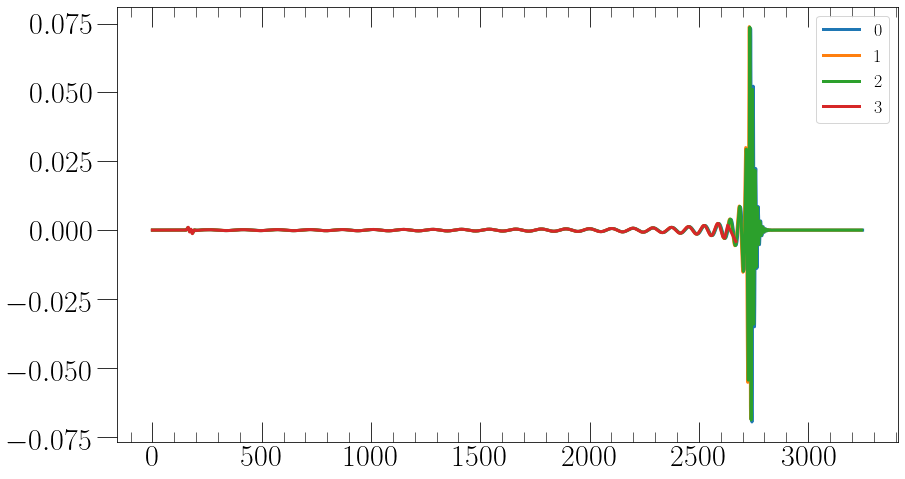

In [4]:
## Plot the strains from NR data
def PlotResolutionRuns():
    
    def GetPsi4Mode(p, radius=0, mode=(2,2)): 
        ## which finite radius should we use?
        l = mode[0]
        m = mode[1]
        psi4_file = p + '/rPsi4_FiniteRadii_CodeUnits.h5' 
        f = h5py.File(psi4_file, 'r')
        radius = sorted(f.keys())[radius]
        data = f[radius]['Y_l' + str(l) + '_m'  + str(m) + '.dat']
        time, re, im = data[:,0], data[:,1], data[:,2]
        Psi4 = re + 1j*im
        return time, Psi4
    
    def GetData(lev):
        p = "/Users/mokounkova/dCS_LIGO_Data/BBH_SKS_2100/Lev" + str(lev)
        time, result = GetPsi4Mode(p)
        plt.plot(time, result, label=lev)

    f, ax = plt.subplots(1, figsize=(14,8))

    for lev in [0,1,2,3]:
        GetData(lev)

    #plt.xlim(2500, 3000)
    plt.legend()
    plt.show()     

PlotResolutionRuns()

In [8]:
## Plot the strains from NR data
def GetPsi4ModeExtrapolated(p, mode, order): 
    l = mode[0]
    m = mode[1]
    psi4_file = p + '/rMPsi4_Asymptotic_GeometricUnits.h5' 
    f = h5py.File(psi4_file, 'r')
    data = f['Extrapolated_N' + str(order) +'.dir']['Y_l' + str(l) + '_m'  + str(m) + '.dat']
    time, re, im = data[:,0], data[:,1], data[:,2]
    Psi4 = re + 1j*im
    return time, Psi4

def GetStrainModeExtrapolated(p, mode, order): 
    l = mode[0]
    m = mode[1]
    h_file = p + '/rhOverM_Asymptotic_GeometricUnits.h5' 
    f = h5py.File(h_file, 'r')
    data = f['Extrapolated_N'+str(order)+'.dir']['Y_l' + str(l) + '_m'  + str(m) + '.dat']
    time, re, im = data[:,0], data[:,1], data[:,2]
    h = re + 1j*im
    return time, h

def GetPsi4Mode(p, mode, radius=0): 
    ## which finite radius should we use?
    l = mode[0]
    m = mode[1]
    psi4_file = p + '/rPsi4_FiniteRadii_CodeUnits.h5' 
    f = h5py.File(psi4_file, 'r')
    radius = sorted(f.keys())[radius]
    data = f[radius]['Y_l' + str(l) + '_m'  + str(m) + '.dat']
    time, re, im = data[:,0], data[:,1], data[:,2]
    Psi4 = re + 1j*im
    return time, Psi4

def GetStrainMode(p, mode, radius=0): 
    ## which finite radius should we use?
    l = mode[0]
    m = mode[1]
    psi4_file = p + '/rh_FiniteRadii_CodeUnits.h5' 
    f = h5py.File(psi4_file, 'r')
    radius = sorted(f.keys())[radius]
    data = f[radius]['Y_l' + str(l) + '_m'  + str(m) + '.dat']
    time, re, im = data[:,0], data[:,1], data[:,2]
    Psi4 = re + 1j*im
    return time, Psi4

(2, 2)


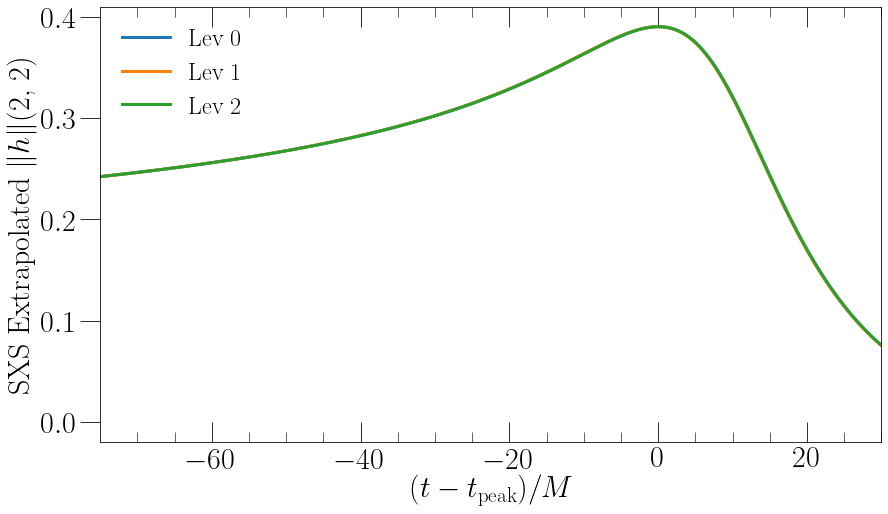

(2, -2)


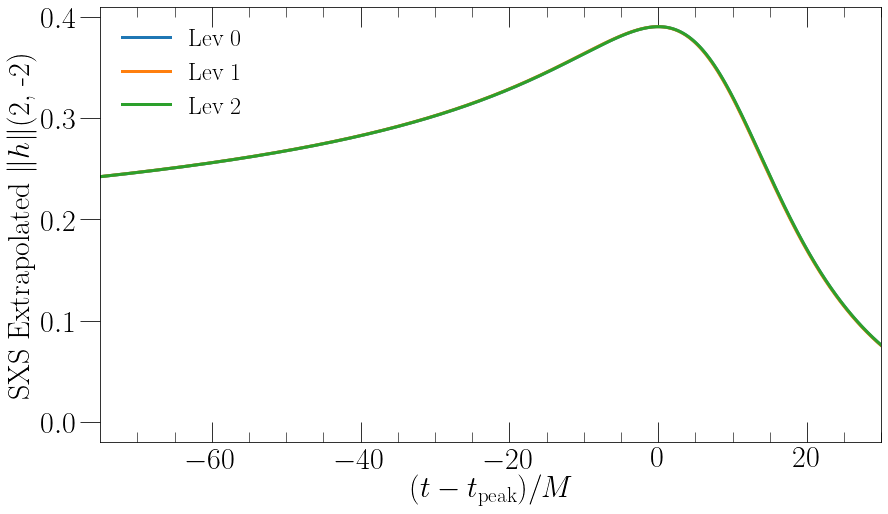

In [31]:
    
def PlotModeRuns(mode, order=2):
    
    def GetData(lev):
        radius = 5
        p = "/Users/mokounkova/dCS_LIGO_Data/BBH_SKS_2100/Lev" + str(lev)
        #time, result = GetStrainModeExtrapolated(p, mode, order)
        time, result = GetStrainMode(p, mode, radius=radius)
        time = SubtractPeakTimeMode(time, result)
        plt.plot(time, np.abs(result), label='Lev ' + str(lev))

    f, ax = plt.subplots(1, figsize=(14,8))

    for lev in [0,1,2]:
        GetData(lev) 

    legend = ax.legend(fontsize=24, loc='best', frameon=False, ncol=1)
    ax.set_ylabel(r'SXS Extrapolated $\|h\|$' + str(mode), fontsize=30)
    ax.set_xlim(-75, 30)
    #ax.set_ylim(0.0, 0.45)
    ax.set_xlabel('$(t - t_\mathrm{peak})/M$', fontsize=30) 
    #ax.set_yscale('log')
    #plt.tight_layout()
    #plt.savefig('SXSResolutions.pdf')
    plt.show()     

#modes = [(l,m) for l in range(2,4) for m in range(-l,l+1)]
#modes = [(2,2)]
#modes = [(2,0)]
#modes = [(2,2), (4,4), (3,3), (3,2), (2,1), (2,0)]
modes = [(2,2), (2,-2)]
for mode in modes:
    print(mode)
    PlotModeRuns(mode)
    

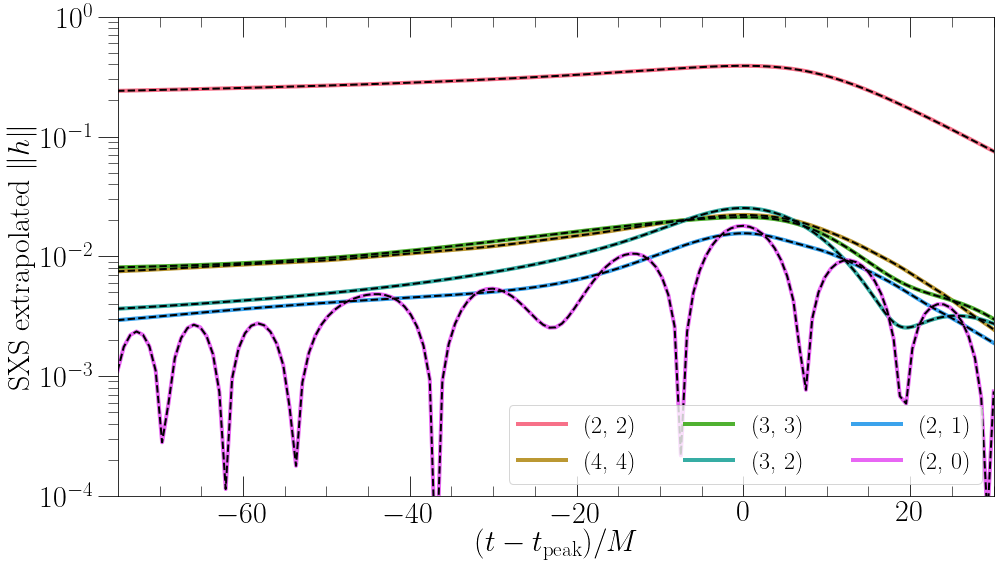

In [42]:
def PlotModeRunsTogether():
    
    order = 2
    
    def GetData(mode, color, lev=0, ls='-'):
        p = "/Users/mokounkova/dCS_LIGO_Data/BBH_SKS_2100/Lev" + str(lev)
        time, result = GetStrainModeExtrapolated(p, mode, order)
        #time, result = GetStrainMode(p, mode, radius=-1)
        time = SubtractPeakTimeMode(time, result)
        label = ''
        lw = 2.0
        if ls == '-':
            label = mode
            lw = 4.0
        plt.plot(time, np.abs(result), label=label, color=color, ls=ls, lw=lw)

    f, ax = plt.subplots(1, figsize=(14,8))

    modes = [(2,2), (4,4), (3,3), (3,2), (2,1), (2,0)]
    #modes = [(l,m) for l in range(2,5) for m in range(-l,l+1)]
    cs = sns.color_palette('husl', n_colors=len(modes))
    
    for mode, i in zip(modes, range(len(modes))):
        GetData(mode, cs[i]) 
        
    modes = [(2,2), (4,4), (3,3), (3,2), (2,1), (2,0)]
    for mode in modes:
        GetData(mode, 'black', ls='--')

    legend = ax.legend(fontsize=24, loc='best', frameon=True, ncol=3)
    ax.set_ylabel(r'SXS extrapolated $\|h\|$', fontsize=30)
    ax.set_xlim(-75, 30)
    ax.set_ylim(1e-4, 1)
    ax.set_xlabel('$(t - t_\mathrm{peak})/M$', fontsize=30) 
    ax.set_yscale('log')
    plt.tight_layout()
    plt.savefig('DominantModes.pdf')
    plt.show()     

PlotModeRunsTogether()
    
    